<a href="https://colab.research.google.com/github/Jesica3018/APMKelompok6/blob/main/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries  

import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
# Importing the data
dataset= pd.read_csv('ParisHousingClass.csv')   

#taking a look at the data
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [ ]:
dataset_encoded=dataset.iloc[:,0:18] 
le=LabelEncoder() 
for i in dataset_encoded: dataset_encoded[i]=le.fit_transform(dataset_encoded[i]) 
dataset_encoded.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,7178,2,0,1,62,917,2,7,15,0,1,2731,5638,856,0,7,7580,0
1,7680,38,1,1,97,3699,7,5,25,1,0,2314,1509,28,1,2,8106,1
2,5287,57,0,1,18,3284,5,7,31,0,0,1860,5536,35,1,9,5584,0
3,3038,46,0,0,5,2676,9,3,22,0,1,442,4447,259,0,3,3196,0
4,6707,18,1,1,89,3579,2,6,0,1,0,5366,1505,192,1,4,7092,1


In [ ]:
x = dataset_encoded.iloc[:, [0,16]].values  
y = dataset_encoded.iloc[:, 17].values

In [ ]:
#splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [ ]:
# Feature Scaling  

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 

In [ ]:
# Fitting Naive Bayes to the Training set  

classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [ ]:
# Predicting the Test set results  

y_pred = classifier.predict(x_test)  

In [ ]:
#Accuracy score

accuracy_score(y_test, y_pred) 

0.876

In [ ]:
#Confusion Matrix  

cm = confusion_matrix(y_test, y_pred)  

print(cm) 

[[2190    0]
 [ 310    0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


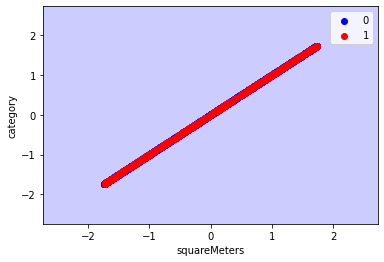

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.2, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('blue', 'red'))(i), label = j)
plt.xlabel('squareMeters')
plt.ylabel('category')
plt.legend()
plt.show()